In [89]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pylab
import skimage
from skimage import measure,feature
import math
#506

In [90]:
image='/masvol/output/dsb/norm/1/3/unet_model_validate/combined_1_3_0_176_aug_drop_dice_predict_cr/dsb_506_176_CR_predictions.npy'
im=np.load(image)
im.shape

(450, 176, 176, 1)

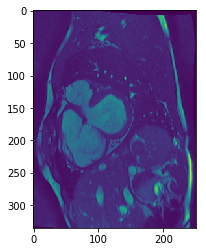

In [292]:
actual_image='/masvol/output/dsb/norm/1/3/validate/506/sax_60_IM-0256-0001.dcm.npy'
plt.imshow(np.load(actual_image))

In [123]:
total_image=im.shape[0]
print('Total labels:::'+str(total_image))

Total labels:::450


In [124]:
#Looping through all the labels and identifying ones with more than one contour
dict_contour_count={}
for i in range(total_image):
    result = im[i][:, :, 0]
    contours = measure.find_contours(result, 0.1)
    contours_created = skimage.measure.find_contours(result, 0.1)
    dict_contour_count[i]=len(contours_created)

In [125]:
images_with_more= ([i for i in dict_contour_count if dict_contour_count[i] > 1])
print('#of labels with more than 1 contour:::'+str(len(images_with_more)))

#of labels with more than 1 contour:::6


In [126]:
#trying to see if something has more than 3 contours
print([i for i in dict_contour_count if dict_contour_count[i] > 2])

[8]


In [10]:
#Verifying the images with more than 1 contour
for i in images_with_more:
    print(i)
    result = im[i][:, :, 0]
    pylab.imshow(result)
    #pylab.show()


NameError: name 'images_with_more' is not defined

In [37]:
def clean_contours(image):
    plt.figure(figsize=(10,10))    
    plt.subplot(221),plt.imshow(image,)
    plt.title('orig Image')
    plt.subplot(222),plt.imshow(feature.canny(image))
    plt.title('orig contour edges')
    dict_shape={}
    t_im1=image
    cntrs=skimage.measure.find_contours(t_im1,0.1)
    print('# of contours identified:::'+str(len(cntrs)))
    for i in range(len(cntrs)):
        print ('contour:'+str(i)+'  shape[0]:'+str(cntrs[i].shape[0]))
        dict_shape[i]=cntrs[i].shape[0]
    print(dict_shape)
    del dict_shape[max(dict_shape, key=dict_shape.get)]
    print(dict_shape)
    for k in dict_shape:
        print ('deleting contour '+str(k))
        x1=math.trunc(np.min(cntrs[k],axis=0)[0])
        y1=math.trunc(np.min(cntrs[k],axis=0)[1])
        print(x1)
        print(y1)
        x2=math.trunc(np.max(cntrs[k],axis=0)[0])
        y2=math.trunc(np.max(cntrs[k],axis=0)[1])
        print(x2)
        print(y2)
        t_im1[x1:x2+1, y1:y2+1]=0
        
    plt.subplot(223),plt.imshow(t_im1)
    plt.title('Fixed Image')
    plt.subplot(224),plt.imshow(feature.canny(t_im1))
    plt.title('Fixed contour edges')    
        

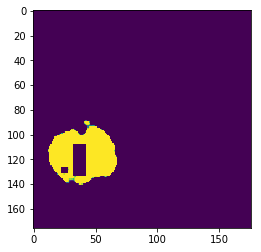

In [127]:
image2=im[8][:,:,0]
plt.imshow(image2)

# of contours identified:::2
contour:0  shape[0]:25
contour:1  shape[0]:125
{0: 25, 1: 125}
{0: 25}
deleting contour 0
64
87
68
95


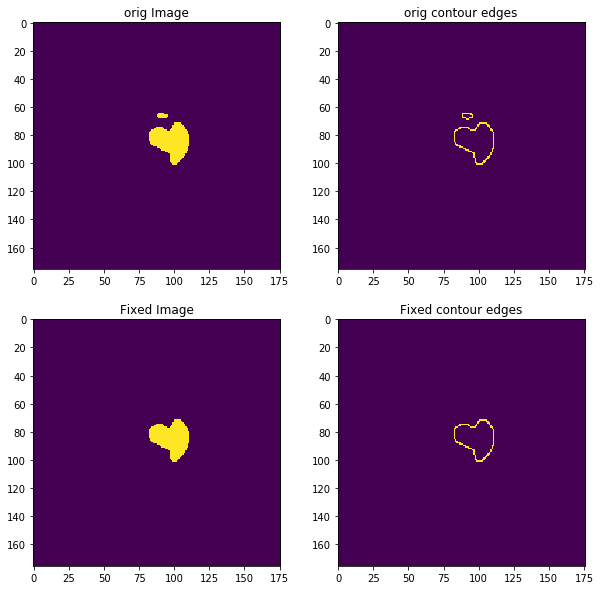

In [41]:
clean_contours(image2)

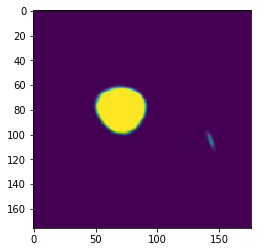

In [60]:
image3=im[220][:,:,0]
plt.imshow(image3)

# of contours identified:::2
contour:0  shape[0]:167
contour:1  shape[0]:41
{0: 167, 1: 41}
{1: 41}
deleting contour 1
98
139
111
146


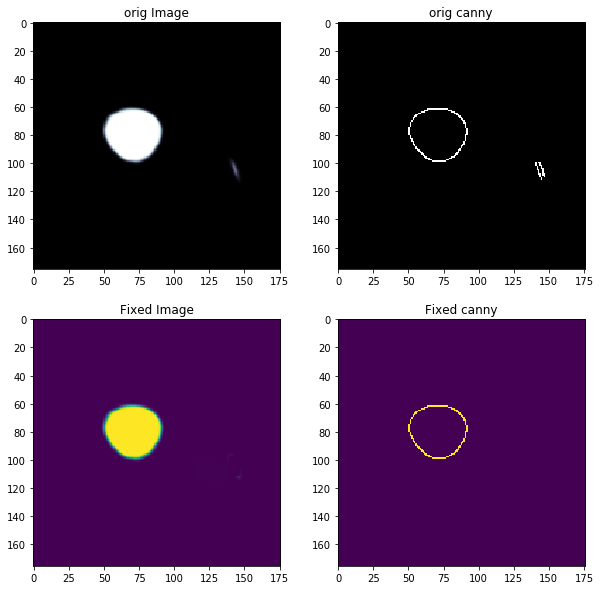

In [61]:
clean_contours(image3)

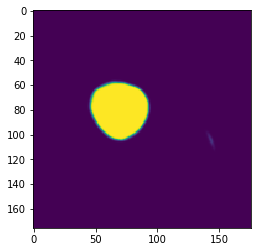

In [49]:
image23=im[23][:,:,0]
plt.imshow(image23)

# of contours identified:::3
contour:0  shape[0]:199
contour:1  shape[0]:5
contour:2  shape[0]:15
{0: 199, 1: 5, 2: 15}
{1: 5, 2: 15}
deleting contour 1
101
141
102
142
deleting contour 2
102
142
107
144


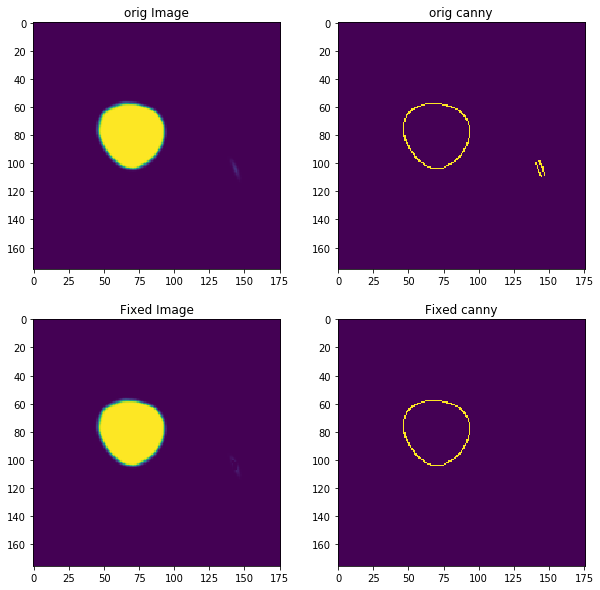

In [50]:
clean_contours(image23)

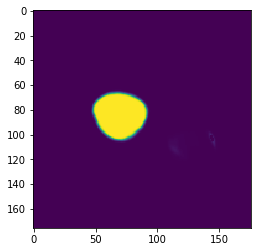

In [20]:
#image24=im[24][:,:,0]
plt.imshow(image24)

In [19]:
clean_contours1(image24)

In [18]:
def clean_contours1(image):
    dict_shape={}
    t_im1=image
    cntrs=skimage.measure.find_contours(t_im1,0.1)
    #print('# of contours identified:::'+str(len(cntrs)))
    for i in range(len(cntrs)):
        #print ('contour:'+str(i)+'  shape[0]:'+str(cntrs[i].shape[0]))
        dict_shape[i]=cntrs[i].shape[0]
    #print(dict_shape)
    del dict_shape[max(dict_shape, key=dict_shape.get)]
    #print(dict_shape)
    for k in dict_shape:
        #print ('deleting contour '+str(k))
        x1=math.trunc(np.min(cntrs[k],axis=0)[0])
        y1=math.trunc(np.min(cntrs[k],axis=0)[1])
        x2=math.trunc(np.max(cntrs[k],axis=0)[0])
        y2=math.trunc(np.max(cntrs[k],axis=0)[1])
        t_im1[x1:x2+1, y1:y2+1]=0   

In [50]:
image_test=np.load('/masvol/output/dsb/norm/1/3/validate/540/sax_7_IM-11207-0013.dcm.npy')

In [51]:
image_test.shape

(440, 440)

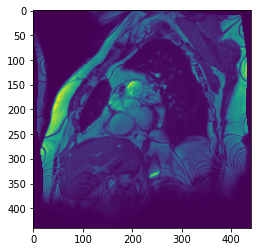

In [45]:
plt.imshow(image_test)

In [52]:
image_test=image_test.reshape(1,image_test.shape[0],image_test.shape[1],1)
image_test.shape

(1, 440, 440, 1)

In [87]:
def clean_contours2(arr):
   #print(self.test_images.shape) 
    finalArray = np.zeros((arr.shape[0], arr.shape[1], arr.shape[2],arr.shape[3]))
    counter=-1
    for t_im1 in arr:
        counter=counter+1
        t_im1 = t_im1[:, :, 0]
        #print(t_im1.shape)
        dict_shape={}
        cntrs=skimage.measure.find_contours(t_im1,0.1)
        print('# of contours identified:::'+str(len(cntrs)))
        for i in range(len(cntrs)):
            dict_shape[i]=cntrs[i].shape[0]
        if  len(cntrs)>0:
            del dict_shape[max(dict_shape, key=dict_shape.get)]
            #print(dict_shape)
        for k in dict_shape:
            print ('deleting contour '+str(k))
            x1=math.trunc(np.min(cntrs[k],axis=0)[0])
            y1=math.trunc(np.min(cntrs[k],axis=0)[1])
            x2=math.trunc(np.max(cntrs[k],axis=0)[0])
            y2=math.trunc(np.max(cntrs[k],axis=0)[1])
            t_im1[x1:x2+1, y1:y2+1]=0   
        print(np.max(t_im1))    
        t_im2=np.zeros((t_im1.shape[0],t_im1.shape[1],1))
        t_im2[:,:,0]=t_im1
        print('im2',np.max(t_im2),t_im2.shape) 
        print('counter',counter)
        finalArray[counter]=t_im2
    return finalArray

In [114]:
a1=clean_contours2(im)

# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 0
# of contours identified:::3
deleting contour 0
deleting contour 1
1.0
im2 1.0 (176, 176, 1)
counter 1
# of contours identified:::4
deleting contour 0
deleting contour 2
deleting contour 3
1.0
im2 1.0 (176, 176, 1)
counter 2
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 3
# of contours identified:::3
deleting contour 1
deleting contour 2
1.0
im2 1.0 (176, 176, 1)
counter 4
# of contours identified:::2
deleting contour 0
1.0
im2 1.0 (176, 176, 1)
counter 5
# of contours identified:::2
deleting contour 1
1.0
im2 1.0 (176, 176, 1)
counter 6
# of contours identified:::2
deleting contour 1
1.0
im2 1.0 (176, 176, 1)
counter 7
# of contours identified:::6
deleting contour 0
deleting contour 1
deleting contour 3
deleting contour 4
deleting contour 5
1.0
im2 1.0 (176, 176, 1)
counter 8
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 9
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 10

# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 223
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 224
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 225
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 226
# of contours identified:::2
deleting contour 0
1.0
im2 1.0 (176, 176, 1)
counter 227
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 228
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 229
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 230
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 231
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 232
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 233
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 234
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 235
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 236
# of contours identified:::1
1.0
im2 1.0 (1

# of contours identified:::2
deleting contour 0
1.0
im2 1.0 (176, 176, 1)
counter 343
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 344
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 345
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 346
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 347
# of contours identified:::2
deleting contour 0
1.0
im2 1.0 (176, 176, 1)
counter 348
# of contours identified:::2
deleting contour 1
1.0
im2 1.0 (176, 176, 1)
counter 349
# of contours identified:::2
deleting contour 1
1.0
im2 1.0 (176, 176, 1)
counter 350
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 351
# of contours identified:::5
deleting contour 0
deleting contour 2
deleting contour 3
deleting contour 4
1.0
im2 1.0 (176, 176, 1)
counter 352
# of contours identified:::1
1.0
im2 1.0 (176, 176, 1)
counter 353
# of contours identified:::2
deleting contour 0
1.0
im2 1.0 (176, 176, 1)
counter 354
# of contours identified:

In [115]:
r=0
for i in im:
    ctr=skimage.measure.find_contours(i[:, :, 0],0.1)
    if len(ctr)>1:
        print(r)
    r=r+1    

8
97
164
252
263
416


In [107]:
ctr=skimage.measure.find_contours(a1[8,:, :, 0],0.1)
print(len(ctr))

3


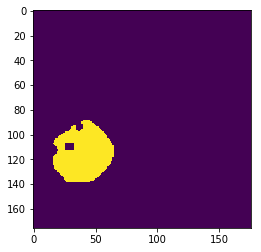

In [116]:
plt.imshow(im[263,:,:,0])
#102,94,64,43

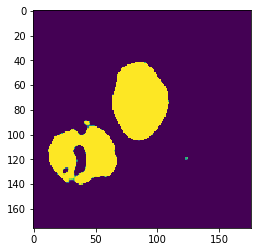

In [74]:
plt.imshow(im[8,:,:,0])

In [ ]:
    def clean_contours(arr):
        #print(self.test_images.shape)                     
        for t_im1  in arr:
            t_im1 = t_im1[:, :, 0]
            #print(t_im1.shape)
            dict_shape={}
            cntrs=skimage.measure.find_contours(t_im1,0.1)
            print('# of contours identified:::'+str(len(cntrs)))
            for i in range(len(cntrs)):
                dict_shape[i]=cntrs[i].shape[0]
            if  len(cntrs)>0:
                del dict_shape[max(dict_shape, key=dict_shape.get)]
            #print(dict_shape)
            for k in dict_shape:
               print ('deleting contour '+str(k))
               x1=math.trunc(np.min(cntrs[k],axis=0)[0])
               y1=math.trunc(np.min(cntrs[k],axis=0)[1])
               x2=math.trunc(np.max(cntrs[k],axis=0)[0])
               y2=math.trunc(np.max(cntrs[k],axis=0)[1])
               t_im1[x1:x2+1, y1:y2+1]=0  

In [ ]:
def fourD_add(arr):
    t=arr
    found_dic={}
    print(t.shape[0])
    x=0
    for i in range(t.shape[0]):
        #print(np.max(t[i,:,:,0]))
        x=x+t[i,:,:,0]
    print(np.max(x))
    tgt=np.where(x==np.max(x))
    print('tgt',tgt)
    x1=max(tgt[0])
    y1=max(tgt[1])
    print('xy',x1,y1)
    point = Point(x1, y1)    
    print(x[x1,y1])
    icount = 0

    for t_im1 in arr:
        print(icount)
        t_im1 = t_im1[:, :, 0]
        icount += 1
        #print(t_im1.shape)
        dict_shape={}
        cntrs=skimage.measure.find_contours(t_im1,0.1)  
        if icount==3:
            break
        found = []

        if len(cntrs)>1:
            print('# of contours identified:::'+str(len(cntrs)), icount)
            
            for i in range(len(cntrs)):
                #print(type(cntrs[i]),cntrs[i].shape)
                print ('cntrs',cntrs[i])
                polygon = Polygon(cntrs[i])  
                if polygon.contains(point):
                    found_dic[i]=1
            found=list(found_dic.keys()) 
            print('40_found',found)
                #else:
                    #found.append(i)
            print('len(found_dic)',len(found_dic))        
            if len(found_dic)==0:
                found_dic0={}
                found=[]
                for i1 in range(len(cntrs)):                    
                #the point was not present in any contour; hence find nearest
                    found_dic0[i1]=polygon.centroid.distance(point)
                del found_dic0[min(found_dic, key=found_dic.get)]
                found=list(found_dic0.keys())
                print('found',found)
                print('found_dic',found_dic)
                """u,v = polygon.exterior.xy
                fig = plt.figure(1, figsize=(5,5), dpi=90)
                ax = fig.add_subplot(111)
                ax.plot(v, u, color='#6699cc', alpha=0.7,
                    linewidth=3, solid_capstyle='round', zorder=2)
                ax.set_title('Polygon')"""
                """print('i',i, cntrs[i][:,0])
                rs = np.isin(x1, cntrs[i][:,0])
                print ('rs',rs)
                
                if rs:
                    print ('f',x1, i, rs)
                    found.append(i)
                    continue
                    
                rs = np.isin(y1, cntrs[i][:,1])
                print ('rs2',rs, cntrs[i][:,1])
                
                if rs:
                    print ('f2',y1, i, rs)
                    found.append(i)
                    continue
                    
                dict_shape[i]=cntrs[i].shape[0]
                
        print ('F',found)
        
        for k in dict_shape:
            print ('deleting contour', k).....
        for i in range(len(cntrs)):
            dict_shape[i]=cntrs[i].shape[0]
            if  len(cntrs)>0:
                del dict_shape[max(dict_shape, key=dict_shape.get)]
            #print(dict_shape)
            for k in dict_shape:
               print ('deleting contour '+str(k))
               x1=math.trunc(np.min(cntrs[k],axis=0)[0])
               y1=math.trunc(np.min(cntrs[k],axis=0)[1])
               x2=math.trunc(np.max(cntrs[k],axis=0)[0])
               y2=math.trunc(np.max(cntrs[k],axis=0)[1])
               t_im1[x1:x2+1, y1:y2+1]=0      """

In [273]:
#im.shape

In [284]:
cntrs=skimage.measure.find_contours(im[8][:, :, 0],.1)

In [285]:
len(cntrs)

3

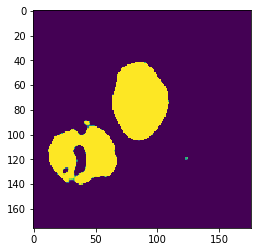

In [91]:
plt.imshow(im[8,:,:,0])

In [ ]:
fourD_add(im)

In [11]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [68]:
point = Point(80, 88)
polygon = Polygon([(0, 8), (5, 1), (1, 11), (1, 0)])

SyntaxError: invalid syntax (<ipython-input-17-12c1d1d51758>, line 1)

In [69]:
print(polygon.centroid)

POINT (3.333333333333333 7)


In [70]:
polygon.centroid.distance(point)

111.52926870457718